In [3]:
import opendatasets as od

In [4]:
dataset = "https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney"

In [5]:
od.download(dataset)

Skipping, found downloaded files in ".\movies-on-netflix-prime-video-hulu-and-disney" (use force=True to force download)


In [6]:
import os

In [7]:
data_dir = '.\movies-on-netflix-prime-video-hulu-and-disney'

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kamba\AppData\Local\Temp\ipykernel_6088\1608882653.py:1: SyntaxWarning: invalid escape sequence '\m'
  data_dir = '.\movies-on-netflix-prime-video-hulu-and-disney'


In [8]:
import pandas as pd

In [9]:
netflix_df = pd.read_csv("MoviesOnStreamingPlatforms.csv")

In [10]:
netflix_df

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [11]:
# Group by platform columns and calculate the mode for the 'Age' column
age_mode_by_platform = netflix_df.groupby(['Netflix', 'Disney+', 'Hulu', 'Prime Video'])['Age'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

# Display the mode for each group
print(age_mode_by_platform)

Netflix  Disney+  Hulu  Prime Video
0        0        0     1                  18+
                  1     0                  18+
                        1                  18+
         1        0     0                  all
                        1                  all
                  1     0                  13+
1        0        0     0                  18+
                        1                  13+
                  1     0                  18+
                        1                  18+
         1        0     0                   7+
                        1              Unknown
                  1     1                  all
Name: Age, dtype: object


In [12]:
netflix_df['Age'] = netflix_df.groupby(['Netflix', 'Disney+', 'Hulu', 'Prime Video'])['Age'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

In [13]:
netflix_df

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,all,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,all,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,all,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,all,10/100,0,0,0,1,0


In [14]:
netflix_df.isnull().sum()

Unnamed: 0         0
ID                 0
Title              0
Year               0
Age                0
Rotten Tomatoes    7
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
dtype: int64

In [15]:
df_netflix = netflix_df.dropna()

In [16]:
df_netflix.isnull().sum()

Unnamed: 0         0
ID                 0
Title              0
Year               0
Age                0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
dtype: int64

In [17]:
netflixdf = df_netflix

In [18]:
netflixdf

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,all,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,all,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,all,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,all,10/100,0,0,0,1,0


In [19]:
netflixdf.drop(columns =['Unnamed: 0'])

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,all,14/100,0,0,0,1,0
9511,9512,Doc McStuffins: The Doc Is In,2020,all,13/100,0,0,0,1,0
9512,9513,Ultimate Viking Sword,2019,all,13/100,0,0,0,1,0
9513,9514,Hunt for the Abominable Snowman,2011,all,10/100,0,0,0,1,0


In [20]:
netflixdf

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,all,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,all,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,all,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,all,10/100,0,0,0,1,0


In [21]:
netflixdf.drop(columns = ['Unnamed: 0','ID'])

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18+,98/100,1,0,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9510,Most Wanted Sharks,2020,all,14/100,0,0,0,1,0
9511,Doc McStuffins: The Doc Is In,2020,all,13/100,0,0,0,1,0
9512,Ultimate Viking Sword,2019,all,13/100,0,0,0,1,0
9513,Hunt for the Abominable Snowman,2011,all,10/100,0,0,0,1,0


In [22]:
netflixdf.dtypes

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

In [23]:
netflixdf['Rotten Tomatoes Score'] = netflixdf['Rotten Tomatoes'].str.extract(r'(\d+)', expand=False).astype(float)

# Display the updated DataFrame
print(netflixdf[['Rotten Tomatoes', 'Rotten Tomatoes Score']].head())


  Rotten Tomatoes  Rotten Tomatoes Score
0          98/100                   98.0
1          97/100                   97.0
2          95/100                   95.0
3          94/100                   94.0
4          94/100                   94.0


C:\Users\kamba\AppData\Local\Temp\ipykernel_6088\2579946282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflixdf['Rotten Tomatoes Score'] = netflixdf['Rotten Tomatoes'].str.extract(r'(\d+)', expand=False).astype(float)


In [24]:
print(netflixdf.head())

   Unnamed: 0  ID                                     Title  Year  Age  \
0           0   1                              The Irishman  2019  18+   
1           1   2                                    Dangal  2016   7+   
2           2   3  David Attenborough: A Life on Our Planet  2020   7+   
3           3   4         Lagaan: Once Upon a Time in India  2001   7+   
4           4   5                                      Roma  2018  18+   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0          98/100        1     0            0        0     0   
1          97/100        1     0            0        0     0   
2          95/100        1     0            0        0     0   
3          94/100        1     0            0        0     0   
4          94/100        1     0            0        0     0   

   Rotten Tomatoes Score  
0                   98.0  
1                   97.0  
2                   95.0  
3                   94.0  
4                   94.0  


In [25]:
Netflix = netflixdf.drop(columns=['Rotten Tomatoes','Unnamed: 0','ID'])

In [26]:
Netflix

,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rotten Tomatoes Score
0,The Irishman,2019,18+,1,0,0,0,0,98.0
1,Dangal,2016,7+,1,0,0,0,0,97.0
2,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,95.0
3,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,94.0
4,Roma,2018,18+,1,0,0,0,0,94.0
...,...,...,...,...,...,...,...,...,...
9510,Most Wanted Sharks,2020,all,0,0,0,1,0,14.0
9511,Doc McStuffins: The Doc Is In,2020,all,0,0,0,1,0,13.0
9512,Ultimate Viking Sword,2019,all,0,0,0,1,0,13.0
9513,Hunt for the Abominable Snowman,2011,all,0,0,0,1,0,10.0


In [27]:
Netflix.to_csv('Netflix_cleaned.csv', index=False)
print("DataFrame has been exported as 'MoviesOnStreamingPlatforms_cleaned.csv'")

DataFrame has been exported as 'MoviesOnStreamingPlatforms_cleaned.csv'


In [28]:
data_info = {
    "columns": Netflix.columns.tolist(),
    "data_types": Netflix.dtypes.to_dict(),
    "summary": Netflix.describe(include="all").transpose(),
    "head": Netflix.head()
}

In [29]:
data_info

{'columns': ['Title',
  'Year',
  'Age',
  'Netflix',
  'Hulu',
  'Prime Video',
  'Disney+',
  'Type',
  'Rotten Tomatoes Score'],
 'data_types': {'Title': dtype('O'),
  'Year': dtype('int64'),
  'Age': dtype('O'),
  'Netflix': dtype('int64'),
  'Hulu': dtype('int64'),
  'Prime Video': dtype('int64'),
  'Disney+': dtype('int64'),
  'Type': dtype('int64'),
  'Rotten Tomatoes Score': dtype('float64')},
 'summary':                         count unique                                  top  \
 Title                    9508   9508  Women of Impact: Changing the World   
 Year                   9508.0    NaN                                  NaN   
 Age                      9508      6                                  18+   
 Netflix                9508.0    NaN                                  NaN   
 Hulu                   9508.0    NaN                                  NaN   
 Prime Video            9508.0    NaN                                  NaN   
 Disney+                9508.0    NaN 

In [30]:
# Filter data for Netflix and Disney+
netflix_data = Netflix[Netflix['Netflix'] == 1]
disney_data = Netflix[Netflix['Disney+'] == 1]

In [31]:
# Descriptive statistics for Age and Rotten Tomatoes Score
age_netflix = netflix_data['Age'].value_counts()
age_disney = disney_data['Age'].value_counts()

rotten_netflix = netflix_data['Rotten Tomatoes Score']
rotten_disney = disney_data['Rotten Tomatoes Score']

In [32]:
age_disney

Age
all        562
7+         280
13+         72
16+          4
18+          3
Unknown      1
Name: count, dtype: int64

In [33]:
age_netflix

Age
18+        2625
13+         443
7+          324
16+         151
all         144
Unknown       1
Name: count, dtype: int64

In [34]:
rotten_netflix

0       98.0
1       97.0
2       95.0
3       94.0
4       94.0
        ... 
3683    10.0
3684    10.0
3685    10.0
3686    10.0
3687    10.0
Name: Rotten Tomatoes Score, Length: 3688, dtype: float64

In [35]:
rotten_disney

270     76.0
712     67.0
1330    59.0
1813    54.0
2029    51.0
        ... 
9510    14.0
9511    13.0
9512    13.0
9513    10.0
9514    10.0
Name: Rotten Tomatoes Score, Length: 922, dtype: float64

In [36]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt 

import numpy as np
import seaborn as sns

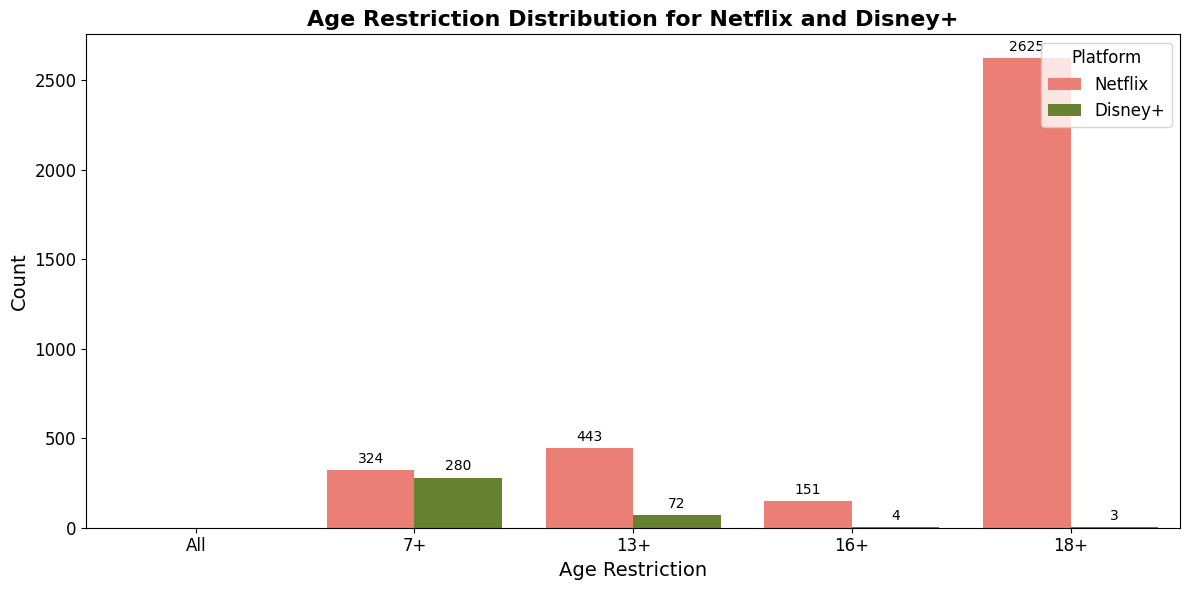

In [37]:
# Plot the distribution of age restrictions for Netflix and Disney+
# Enhanced plot for Age Restriction Distribution
plt.figure(figsize=(12, 6))

# Sorting age categories for logical order
order = ['All', '7+', '13+', '16+', '18+']  # Replace with actual order if different

sns.countplot(
    data=Netflix.melt(
        id_vars=['Age'], value_vars=['Netflix', 'Disney+'], 
        var_name='Platform', value_name='Available'
    ).query('Available == 1'), 
    x='Age', hue='Platform', palette=['#FF6F61', '#6B8E23'], order=order
)

# Adding title and labels
plt.title('Age Restriction Distribution for Netflix and Disney+', fontsize=16, fontweight='bold')
plt.xlabel('Age Restriction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customizing legend
plt.legend(title='Platform', title_fontsize=12, fontsize=12, loc='upper right')

# Adding value annotations
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

C:\Users\kamba\AppData\Local\Temp\ipykernel_6088\142225088.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




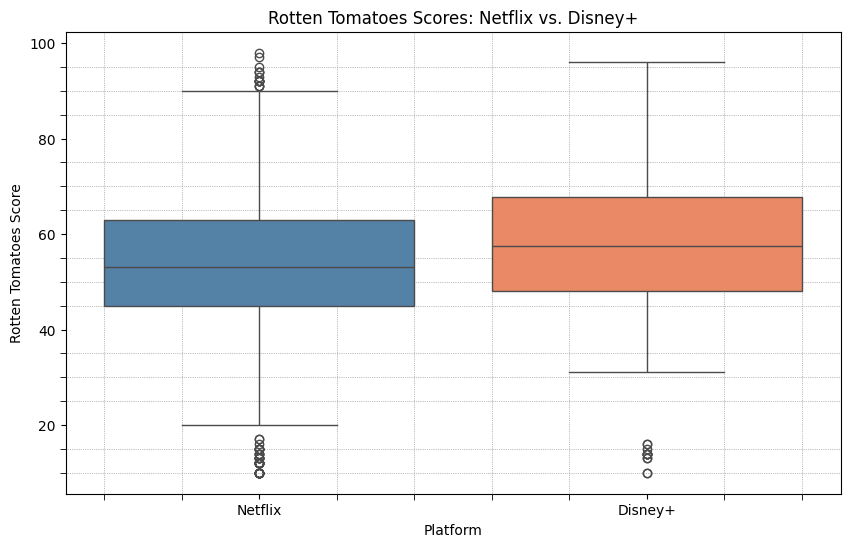

In [50]:
!pip install plotly
# Boxplot for Rotten Tomatoes Scores
plt.figure(figsize=(10,6))
sns.boxplot(data = Netflix.melt(id_vars=['Rotten Tomatoes Score'], value_vars=['Netflix', 'Disney+'], var_name='Platform', value_name='Available').query('Available == 1'), 
            x='Platform', y='Rotten Tomatoes Score', palette={'Netflix': 'steelblue', 'Disney+': 'coral'})
plt.title('Rotten Tomatoes Scores: Netflix vs. Disney+')
plt.ylabel('Rotten Tomatoes Score')
plt.xlabel('Platform')

# Add minor ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', length=4, color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()

C:\Users\kamba\AppData\Local\Temp\ipykernel_6088\2659236895.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




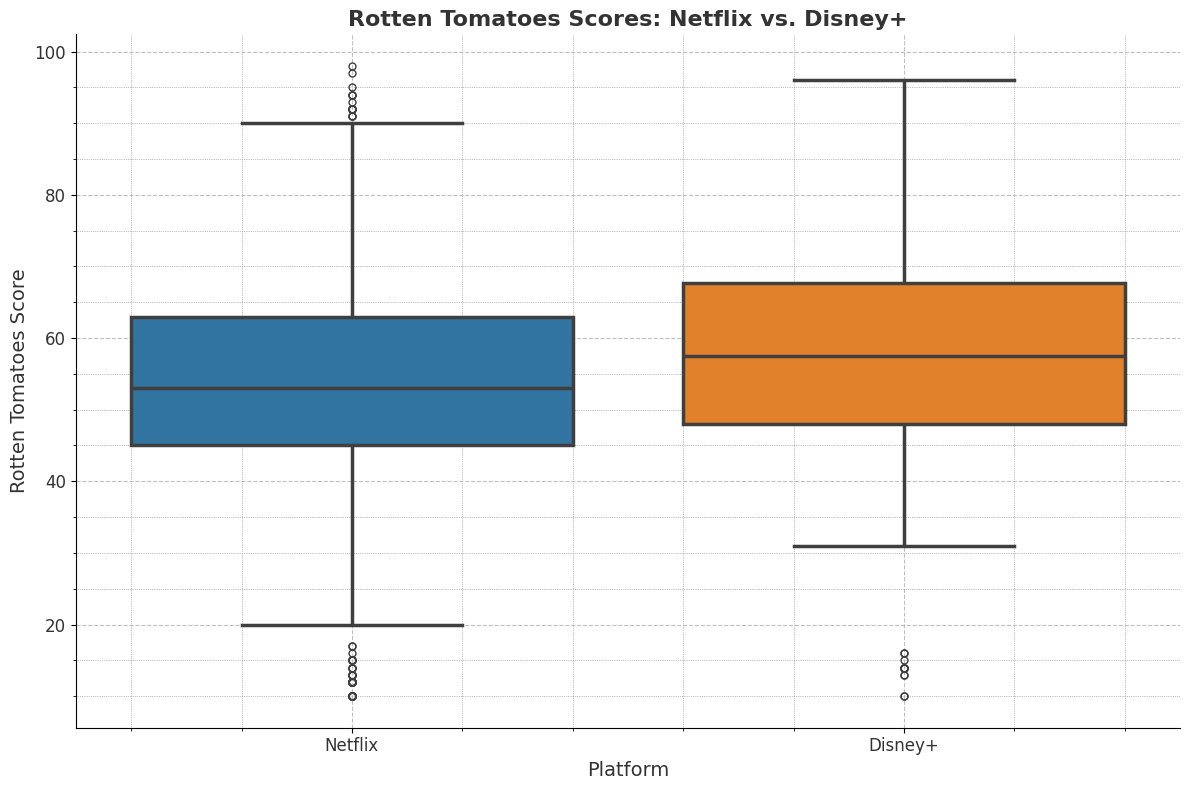

In [52]:
# Beautified boxplot using seaborn
plt.figure(figsize=(12, 8))

# Sorting platforms for logical order
platform_order = ['Netflix', 'Disney+']

# Boxplot with enhanced aesthetics
sns.boxplot(
    data=Netflix.melt(
        id_vars=['Rotten Tomatoes Score'], 
        value_vars=['Netflix', 'Disney+'], 
        var_name='Platform', 
        value_name='Available'
    ).query('Available == 1'),
    x='Platform', y='Rotten Tomatoes Score', 
    order=platform_order,
    palette={'Netflix': '#1f77b4', 'Disney+': '#ff7f0e'},
    linewidth=2.5,
    fliersize=5  # Customize outlier marker size
)

# Adding titles and labels
plt.title('Rotten Tomatoes Scores: Netflix vs. Disney+', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Platform', fontsize=14, color='#333333')
plt.ylabel('Rotten Tomatoes Score', fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Minor ticks and grid
plt.minorticks_on()
plt.grid(which='major', linestyle='--', alpha=0.8)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

# Removing top and right spines for a cleaner look
sns.despine()

plt.tight_layout()


In [39]:
# Subset the data for Netflix and Disney+
netflix_scores = Netflix.loc[ Netflix['Netflix'] == 1, 'Rotten Tomatoes Score']
disney_scores = Netflix.loc[ Netflix['Disney+'] == 1, 'Rotten Tomatoes Score']

# Get descriptive statistics
netflix_stats = netflix_scores.describe()
disney_stats = disney_scores.describe()

# Calculate IQR, min, max, and outliers for Netflix
netflix_q1 = netflix_scores.quantile(0.25)
netflix_q3 = netflix_scores.quantile(0.75)
netflix_iqr = netflix_q3 - netflix_q1
netflix_min = netflix_q1 - 1.5 * netflix_iqr
netflix_max = netflix_q3 + 1.5 * netflix_iqr
netflix_outliers = netflix_scores[(netflix_scores < netflix_min) | (netflix_scores > netflix_max)]

# Calculate IQR, min, max, and outliers for Disney+
disney_q1 = disney_scores.quantile(0.25)
disney_q3 = disney_scores.quantile(0.75)
disney_iqr = disney_q3 - disney_q1
disney_min = disney_q1 - 1.5 * disney_iqr
disney_max = disney_q3 + 1.5 * disney_iqr
disney_outliers = disney_scores[(disney_scores < disney_min) | (disney_scores > disney_max)]

# Print the statistics
print("Netflix Statistics:")
print(netflix_stats)
print(f"IQR: {netflix_iqr}, Min: {netflix_min}, Max: {netflix_max}, Outliers: {len(netflix_outliers)}")

print("\nDisney+ Statistics:")
print(disney_stats)
print(f"IQR: {disney_iqr}, Min: {disney_min}, Max: {disney_max}, Outliers: {len(disney_outliers)}")

Netflix Statistics:
count    3688.000000
mean       54.447939
std        13.847615
min        10.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: Rotten Tomatoes Score, dtype: float64
IQR: 18.0, Min: 18.0, Max: 90.0, Outliers: 69

Disney+ Statistics:
count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: Rotten Tomatoes Score, dtype: float64
IQR: 19.75, Min: 18.375, Max: 97.375, Outliers: 13


In [40]:
# Compute basic statistics for Rotten Tomatoes scores
rotten_stats = {
    "Netflix": rotten_netflix.describe(),
    "Disney+": rotten_disney.describe()
}
print(rotten_stats)

{'Netflix': count    3688.000000
mean       54.447939
std        13.847615
min        10.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: Rotten Tomatoes Score, dtype: float64, 'Disney+': count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: Rotten Tomatoes Score, dtype: float64}


In [41]:
# Convert Age restrictions to numerical codes
age_mapping = {'all': 0, '7+': 7, '13+': 13, '16+': 16, '18+': 18}
netflix_data['Age_Code'] = netflix_data['Age'].map(age_mapping)
disney_data['Age_Code'] = disney_data['Age'].map(age_mapping)

C:\Users\kamba\AppData\Local\Temp\ipykernel_6088\1135773401.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kamba\AppData\Local\Temp\ipykernel_6088\1135773401.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
age_mapping

{'all': 0, '7+': 7, '13+': 13, '16+': 16, '18+': 18}

In [43]:
from scipy.stats import mannwhitneyu, ttest_ind

In [44]:
# Perform Mann-Whitney U Test for Age Restrictions
age_test_stat, age_p_value = mannwhitneyu(netflix_data['Age_Code'].dropna(), disney_data['Age_Code'].dropna(), alternative='greater')


In [45]:
# Perform Two-Sample T-Test for Rotten Tomatoes Scores
score_test_stat, score_p_value = ttest_ind(rotten_netflix.dropna(), rotten_disney.dropna())

In [46]:
# Results
test_results = {
    "Age Test Statistic": age_test_stat,
    "Age Test P-Value": age_p_value,
    "Rotten Tomatoes Test Statistic": score_test_stat,
    "Rotten Tomatoes Test P-Value": score_p_value
}
print(test_results)

{'Age Test Statistic': np.float64(3208869.5), 'Age Test P-Value': np.float64(0.0), 'Rotten Tomatoes Test Statistic': np.float64(-7.567567531710881), 'Rotten Tomatoes Test P-Value': np.float64(4.5645960458960904e-14)}


In [47]:
test_results

{'Age Test Statistic': np.float64(3208869.5),
 'Age Test P-Value': np.float64(0.0),
 'Rotten Tomatoes Test Statistic': np.float64(-7.567567531710881),
 'Rotten Tomatoes Test P-Value': np.float64(4.5645960458960904e-14)}